person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64
Epoch 1/100


/Users/samenergy/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/samenergy/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2801/2801 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.8453 - loss: 0.3190 - val_accuracy: 0.8969 - val_loss: 0.2904
Epoch 2/100
2801/2801 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step - accuracy: 0.8891 - loss: 0.2432 - val_accuracy: 0.9297 - val_loss: 0.2234
Epoch 3/100
2801/2801 ━━━━━━━━━━━━━━━━━━━━ 1s 385us/step - accuracy: 0.8912 - loss: 0.2367 - val_accuracy: 0.9159 - val_loss: 0.2366
Epoch 4/100
2801/2801 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - accuracy: 0.8945 - loss: 0.2332 - val_accuracy: 0.9188 - val_loss: 0.2282
Epoch 5/100
2801/2801 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step - accuracy: 0.8957 - loss: 0.2267 - val_accuracy: 0.9345 - val_loss: 0.1950
Epoch 6/100
2801/2801 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step - accuracy: 0.8951 - loss: 0.2258 - val_accuracy: 0.8954 - val_loss: 0.2664
Epoch 7/100
2801/2801 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step - accuracy: 0.8952 - loss: 0.2240 - val_accuracy: 0.9323 - val_loss: 0.1966
Epoch 8/100
2801/2801 ━━━━━━━━━━━━━━━━━━━━ 1s 384us/step - accuracy: 0.8939 - los

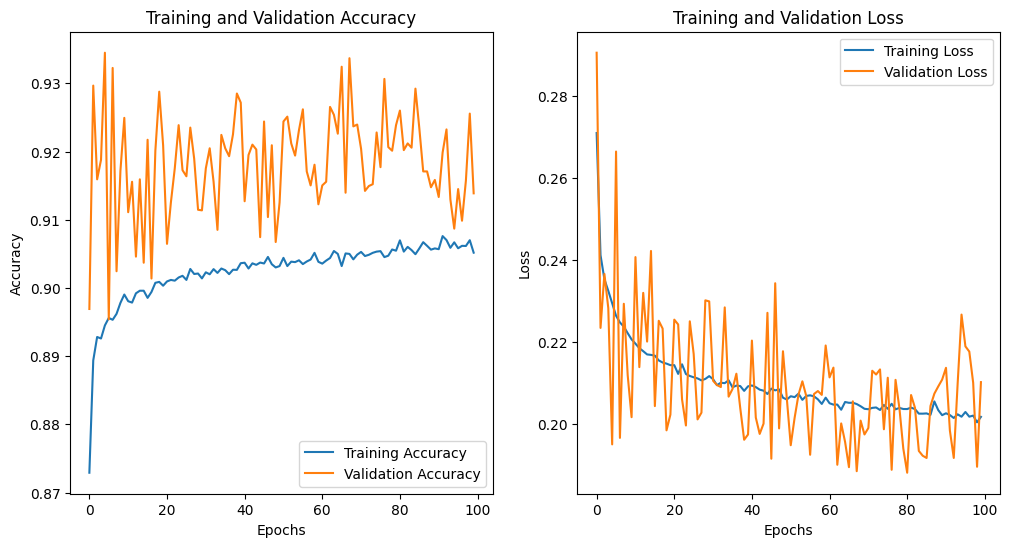

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.9008 - loss: 0.2054
Test Accuracy: 0.9023
Test Loss: 0.2031
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step


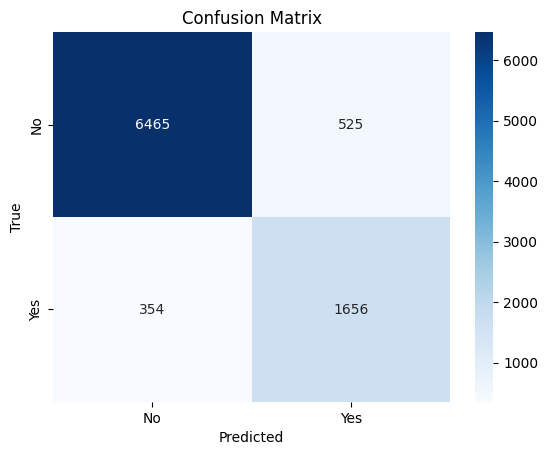

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      6990
           1       0.76      0.82      0.79      2010

    accuracy                           0.90      9000
   macro avg       0.85      0.87      0.86      9000
weighted avg       0.91      0.90      0.90      9000



In [19]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Load the dataset
data = pd.read_csv('loan_data.csv')

# Data Preprocessing

# Check for missing values
print(data.isnull().sum())

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()

# Encoding 'person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', and 'loan_status'
data['person_gender'] = label_encoder.fit_transform(data['person_gender'])
data['person_education'] = label_encoder.fit_transform(data['person_education'])
data['person_home_ownership'] = label_encoder.fit_transform(data['person_home_ownership'])
data['loan_intent'] = label_encoder.fit_transform(data['loan_intent'])
data['previous_loan_defaults_on_file'] = label_encoder.fit_transform(data['previous_loan_defaults_on_file'])
data['loan_status'] = label_encoder.fit_transform(data['loan_status'])

# Features and target variable
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE - Handle class imbalance in the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural Network Model
model = keras.Sequential()

# Adding layers to the neural network
model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))  # Dropout to avoid overfitting
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))  # Dropout to avoid overfitting
model.add(keras.layers.Dense(1, activation='sigmoid'))  # Binary output for loan approval status

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Predictions
y_pred = (model.predict(X_test) > 0.5)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Save the model
model.save('loan_approval_model.h5')

# Optionally, save the scaler and label encoder
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
    
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
